In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import chi2
%matplotlib inline

In [2]:
def rank_matrix(matrix):
    cnum = matrix.shape[1]
    rnum = matrix.shape[0]
    ## 升序排序索引
    sorts = np.argsort(matrix)
    for i in range(rnum):
        k = 1
        n = 0
        flag = False
        nsum = 0
        for j in range(cnum):
            n = n+1
            ## 相同排名评分序值
            if j < 3 and matrix[i, sorts[i,j]] == matrix[i, sorts[i,j + 1]]:
                flag = True;
                k = k + 1;
                nsum += j + 1;
            elif (j == 3 or (j < 3 and matrix[i, sorts[i,j]] != matrix[i, sorts[i,j + 1]])) and flag:
                nsum += j + 1
                flag = False;
                for q in range(k):
                    matrix[i,sorts[i,j - k + q + 1]] = nsum / k
                k = 1
                flag = False
                nsum = 0
            else:
                matrix[i, sorts[i,j]] = j + 1
                continue
    return matrix

In [3]:
def friedman(n, k, rank_matrix):
    sumr = sum(list(map(lambda x: np.sum(x) ** 2, rank_matrix.T)))
    
    chi2_ = (12  * sumr / (n * k * (k + 1))) - 3 * n * (k + 1)
    p = chi2.sf(abs(chi2_), k-1)
    
    print('n = {}, k = {}, 卡方 = {}, p = {}'.format(n, k, chi2_, p))
    return chi2_

# 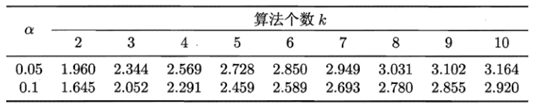

In [4]:
# def nemenyi(n, k, q):
#     return q * (np.sqrt(k * (k + 1) / (6 * n)))
def nemenyi(n = 8, k = 8, a = 0.05):
    if a == 0.05 and k == 8: q = 3.031
    if a == 0.05 and k == 5: q = 2.728
    if a == 0.05 and k == 4: q = 2.569
    if a == 0.1 and k == 8: q = 2.780
    if a == 0.1 and k == 5: q = 2.459
    if a == 0.1 and k == 4: q = 2.291
    CD = q * (np.sqrt(k * (k + 1) / (6 * n)))
    print('samples(n) = {}, methods(k) = {}, alpha = {}, q = {}, CD = {}'.format(n, k, a, q, CD))
    return CD

In [5]:
##画CD图
def draw_CD(matrix, data, n ,k ,a):
    CD = nemenyi(n, k, a)
    rank_x = list(map(lambda x: np.mean(x), matrix.T))
    name_y = data.columns

    min_ = [x for x in rank_x - CD/2]
    max_ = [x for x in rank_x + CD/2]

    plt.clf()
    
    if len(name_y) == 8: 
        color = ['crimson', 'crimson', 'crimson', 'crimson', 'crimson', 'green', 'green', 'green']
        plt.rcParams['figure.figsize'] = (5,8)
        filename = 'all'
    if len(name_y) == 5: 
        color = ['green', 'green', 'crimson', 'green', 'green']
        plt.rcParams['figure.figsize'] = (5,3)
        filename = 'labelpropogation_compared'
    if len(name_y) == 4: 
        color = ['crimson', 'green', 'green', 'green']
        plt.rcParams['figure.figsize'] = (5,3)
        filename = 'community_detection'

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'    
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.scatter(rank_x,name_y, color = color)
    plt.hlines(name_y,min_,max_, color = color)
#     print(plt.rcParams['figure.figsize'],plt.rcParams['figure.dpi'],plt.rcParams['savefig.dpi'])
    plt.savefig('./Figure/v2_Friedman_' + filename + '_' + str(a) + '.pdf')
    return

# Run

In [6]:
data = pd.read_csv('假设检验数据.csv', index_col = 0).T
data_auc = data.loc[np.array(data.index)[range(8,16)]]
data_aupr = data.loc[np.array(data.index)[range(8)]]

matrix = np.array(data)
matrix_auc = np.array(data_auc)
matrix_aupr = np.array(data_aupr)

print(matrix.shape, matrix_auc.shape, matrix_aupr.shape)

matrix_r = rank_matrix(matrix)
matrix_auc_r = rank_matrix(matrix_auc)
matrix_aupr_r = rank_matrix(matrix_aupr)

(16, 8) (8, 8) (8, 8)


n = 16, k = 8, 卡方 = 54.708333333333314, p = 1.7030433862266386e-09
samples(n) = 16, methods(k) = 8, alpha = 0.05, q = 3.031, CD = 2.6249229988706335


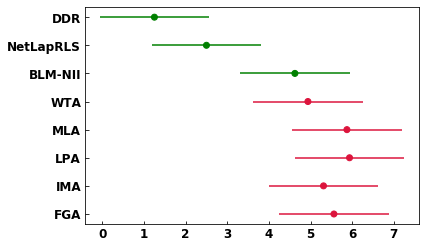

In [7]:
Friedman = friedman(16, 8, matrix_r)
draw_CD(matrix, data, n = 16, k = 8, a = 0.05)

n = 8, k = 8, 卡方 = 36.54166666666666, p = 5.727655028962873e-06
samples(n) = 8, methods(k) = 8, alpha = 0.05, q = 3.031, CD = 3.712201705187906


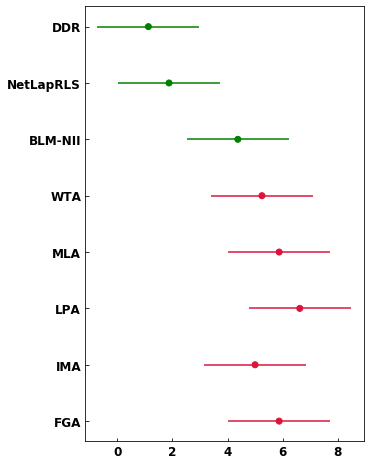

In [8]:
Friedman_aupr = friedman(8, 8, matrix_aupr_r)
draw_CD(matrix_aupr, data_aupr, n = 8, k = 8, a = 0.05)